In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandasql import sqldf
import sqlite3
import math as m
import matplotlib.ticker as mtick
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 100)

In [2]:
db_path = '/Users/tokihossoin/PythonDataAnalysisPrayerAssitApp/PythonAnalysis/MarketResearch/ONS_IslamicData/ONSIslam_pop_age_2021.csv'

muslim_age_data = pd.read_csv(db_path)

muslim_age_data.set_index('age')


,mus_female_2021,mus_male_2021,mus_female_perct_2021,mus_male_perct_2021,mus_female_2011,mus_male_2021.1,mus_female_perct_2011,mus_male_perct_2011,fermale_2021,male_2021,female_perct_2021,male_perct_2021,Unnamed: 13,Unnamed: 14
age,,,,,,,,,,,,,,
0,33180,34710,0.86,0.90,29927,31234,1.11,1.15,296690,310635,0.50,0.52,NaN,NaN
1,35585,36900,0.92,0.95,30991,32637,1.15,1.21,310355,325410,0.52,0.55,NaN,NaN
2,35785,36655,0.93,0.95,31756,32926,1.17,1.22,316680,333515,0.53,0.56,NaN,NaN
3,35630,36360,0.92,0.94,31994,33447,1.18,1.24,321870,336900,0.54,0.57,NaN,NaN
4,37365,39580,0.97,1.02,30793,32247,1.14,1.19,331750,348235,0.56,0.58,NaN,NaN
5,37190,39015,0.96,1.01,30843,31943,1.14,1.18,338005,355130,0.57,0.60,NaN,NaN
6,37125,38845,0.96,1.00,28727,29477,1.06,1.09,334245,350400,0.56,0.59,NaN,NaN
7,37505,38955,0.97,1.01,27567,28562,1.02,1.06,338615,354630,0.57,0.60,NaN,NaN
8,38180,40020,0.99,1.03,26864,28013,0.99,1.04,352045,370285,0.59,0.62,NaN,NaN


In [7]:
mus_age_pop_bracket_2021 = """
WITH 
total_muslim_population_by_age AS (
SELECT
age, 
mus_male_2021 + mus_female_2021 AS total_pop
FROM muslim_age_data
)
, age_bracket AS (
SELECT 
SUM(CASE WHEN age>=0 AND age<=10 THEN total_pop END) AS age_0_10,
SUM(CASE WHEN age>=11 AND age<=20 THEN total_pop END) AS age_11_20,
SUM(CASE WHEN age>=21 AND age<=30 THEN total_pop END) AS age_21_30,
SUM(CASE WHEN age>=31 AND age<=40 THEN total_pop END) AS age_31_40,
SUM(CASE WHEN age>=41 AND age<=50 THEN total_pop END) AS age_41_50,
SUM(CASE WHEN age>=51 AND age<=60 THEN total_pop END) AS age_51_60
FROM total_muslim_population_by_age
)

, custom_analysis AS (
SELECT 
SUM(CASE WHEN age>=18 AND age<=30 THEN total_pop END) AS age_18_30
FROM total_muslim_population_by_age
)

SELECT * FROM age_bracket
-- SELECT * FROM custom_analysis
"""
query_result = sqldf(mus_age_pop_bracket_2021,globals())
query_result

,age_0_10,age_11_20,age_21_30,age_31_40,age_41_50,age_51_60
0,218045,788660,647825,734120,614520,369630


1436485


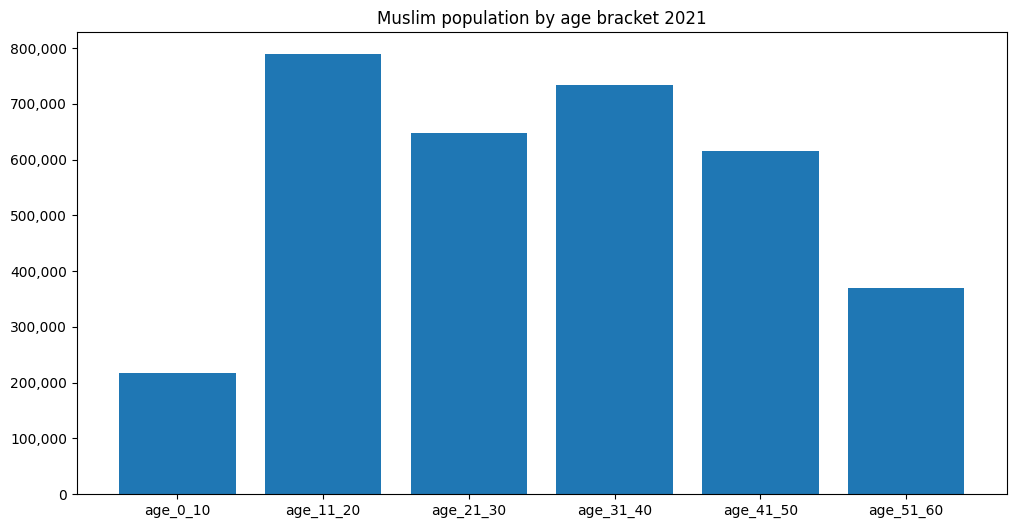

In [8]:
fig = plt.figure(figsize=(12, 6))
axes = plt.gca()
axes.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

age_bracket = query_result.columns.tolist()
population = query_result.values.tolist()[0]
# Muslim population by age
plt.title("Muslim population by age bracket 2021")
plt.bar(age_bracket,population)
print(population[1]+population[2])
